# Páginas para programar python

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

## NYC MATH TEST 2006-2011

## Introduccion
En este programa se presnetara el acomodo de el dataset City
"2006 - 2011 NYS Math Test Results by Grade - Citywide - by Race-Ethnicity".
En donde se ve las calificaciones obtenidas divididas en por grados y raza etnicas. En los "Levels" se encuentra el nivel de co petencia que se tiene en cada grado.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

## Descripcion de Variables
Grade - Grado que se cursa 

Year - año

Category - raza etnica

Number Tested - Personas que presentaron

Mean Scale Score - Ponderacion de las calificaciones 

Level # - Nivel de Competencia 

Level % - Nivel de Competencia

In [4]:
df = pd.read_csv('NYS_Math_Test_Results.csv')
df

,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,3,2006,Asian,9768,700,243,2.5,543,5.6,4128,42.3,4854,49.7,8982,92.0
1,4,2006,Asian,9973,699,294,2.9,600,6.0,4245,42.6,4834,48.5,9079,91.0
2,5,2006,Asian,9852,691,369,3.7,907,9.2,4379,44.4,4197,42.6,8576,87.0
3,6,2006,Asian,9606,682,452,4.7,1176,12.2,4646,48.4,3332,34.7,7978,83.1
4,7,2006,Asian,9433,671,521,5.5,1698,18.0,4690,49.7,2524,26.8,7214,76.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,5,2011,White,10808,699,311,2.9,1709,15.8,4532,41.9,4256,39.4,8788,81.3
164,6,2011,White,9875,695,409,4.1,1818,18.4,3435,34.8,4213,42.7,7648,77.4
165,7,2011,White,9679,690,423,4.4,1739,18.0,3023,31.2,4494,46.4,7517,77.7
166,8,2011,White,9570,688,433,4.5,2190,22.9,4142,43.3,2805,29.3,6947,72.6


#### Pregunta 1
Cual es la Raza Etnica con el promedio mas alto?

Entre que resultados se tiene en el promedio?

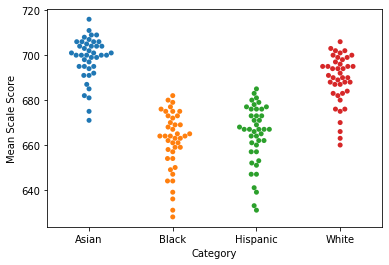

In [5]:
sns.swarmplot(x = 'Category',
              y = 'Mean Scale Score',
              data = df
             )

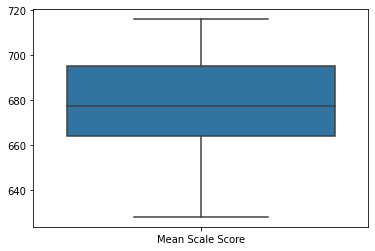

In [6]:
sns.boxplot(data = df.loc[:, ['Mean Scale Score']],
             )

#### Resultados

- Los asiaticos son los que mejor promedio generan.

- Existe un range en el promedio de calificacion 620 a 720.

## Preguntas 2
Existen valores atipicos en cuantas personas presentaron? 

Existe un nivel de competitividad mejor en cada nivel? Y entre que rangos se califican los niveles "Level %"?

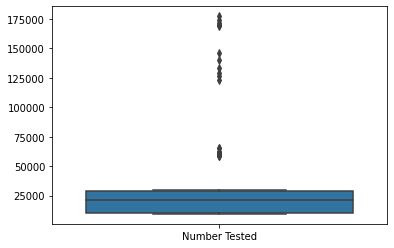

In [7]:
sns.boxplot(data = df.loc[:, ['Number Tested']],
             )

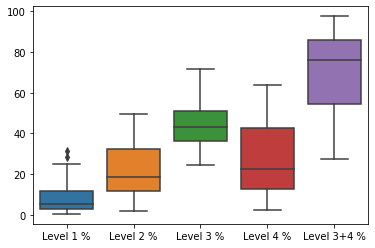

In [12]:
sns.boxplot(data = df.loc[:, ['Level 1 %', 'Level 2 %',
       'Level 3 %', 'Level 4 %', 'Level 3+4 %']],
             )

#### Resultados
- Existen valores atipicos en donde hubo un numero exagerado de personas que presetaron. Y los rangos en el nievl % son de 0 a 100 indicando que se habla de porcentaje y podemos ver que si existe un crecimiento de competitividad en cada nivel excepto por el nivel 4 que se redujo este porcentaje.

## Preguntas 3
Cual es la Categoria que mas presenta el examen?

Existe alguna correlacion entre las calificaciones y el numer de personas que presentaron?

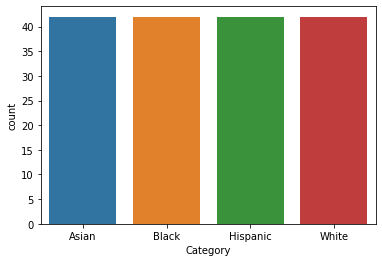

In [9]:
sns.countplot(x = 'Category',data = df)

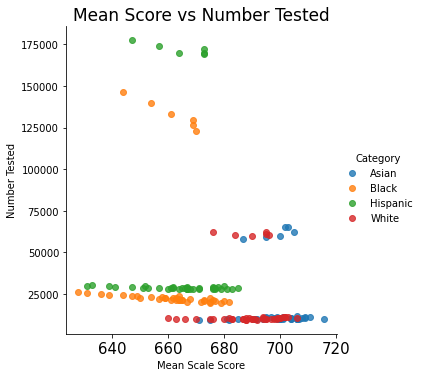

In [10]:
sns.lmplot (x= 'Mean Scale Score',
            y = 'Number Tested',
            data = df,
            fit_reg = False,
            hue = 'Category'
            
           )
plt.title('Mean Score vs Number Tested', fontsize = 17)
plt.xticks(fontsize = 15)
plt.show()

#### Resultados
- Presentaron la misma cantidad de personas de cada raza etnica. Y no existe una correlacion entre los valores de la cantidad de personas presentadas y el promedio. Esto se debe a que existen muchos valores atipicos en donde si se eliminan si existiria una correlacion positiva.

## CONCLUSION
- Como quedaria acomodado de mejor manera una tabla pivote. Viendo el promedio de calificaciones de cada raza etnica en cada grado.

In [11]:
my_pivot = pd.pivot_table(df,
                          index = 'Grade',
                          values = ['Mean Scale Score','Number Tested'],
                          columns = 'Category',
                          aggfunc = 'mean'
                         )
my_pivot  

Mean Scale Score                                     Number Tested  \
Category              Asian       Black    Hispanic       White         Asian   
Grade                                                                           
3                705.000000  676.000000  678.333333  698.833333  10351.000000   
4                707.000000  669.166667  672.166667  698.166667  10323.333333   
5                701.833333  665.500000  668.833333  693.500000  10349.666667   
6                697.000000  657.000000  660.000000  685.833333  10087.333333   
7                690.166667  653.000000  655.833333  681.500000  10144.000000   
8                690.333333  649.000000  652.500000  676.666667  10311.333333   
All Grades       698.666667  661.166667  664.500000  689.333333  61566.666667   

                                                        
Category            Black       Hispanic         White  
Grade                                                   
3            21343.666667   28854.666667  10759.166667  
4            21490.833333   28589.166667  10475.833333  
5            21620.000000   28497.333333  10276.000000  
6            21949.666667   28166.833333   9820.833333  
7            22982.500000   28765.666667   9773.500000  
8            23565.000000   29168.000000   9938.666667  
All Grades  132951.666667  172041.666667  61044.000000

#### Limitaciones
No pude crear un rango de niveles y presentarlo como valores como lo hicimos en la clase 5. Para crear graficas de tendencias.